# Preparación del notebook

In [ ]:
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 KB 3.0 MB/s eta 0:00:00


In [ ]:
# Carga de librerías funciones y paquetes
import numpy as np
import pygad
import matplotlib.pyplot as plt
import random
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

# Elección de funciones

Codificación de las funciones:
*   Rosenbrock
*   Rastrigin

In [ ]:
#Con A=10
def rastrigin(x,solution_idx=None):
  z = 10 * len(x) + np.sum(x ** 2 - 10 * np.cos(2 * np.pi * x))
  fitness = -z
  return(fitness)

#Con a=1,b=100
def rosenbrock2d(x,solution_idx=None):
  x1 = x[0]
  x2 = x[1]
  factor1 = (x2-x1 ** 2) ** 2
  factor2 = (1 -x1) ** 2
  z = np.sum(100*factor1 + factor2)
  fitness = -z
  return(fitness)

# Decenso por gradiente

In [ ]:
#Cálculos numéricos aproximados de las derivadas parciales
def derivada_parcial(x,i,fun,h=0.01):
  e=np.zeros(len(x))
  e[i-1]=h
  z=(-fun(x+e)+fun(x-e))/(2*h)
  return(z)

#Vector con todas las derivadas parciales
def gradiente(x,fun,h=0.01):
  e=np.zeros(len(x))
  z=np.zeros(len(x))
  for i in range(len(x)):
    e[i]=h
    z[i]=(-fun(x+e)+fun(x-e))/(2*h)
    e[i]=0
  return(z)

In [ ]:
#Generacion de vectores aleatorios
def aleatorio(n,semilla,inicio,fin):
  random.seed(semilla)
  A=np.zeros(n)
  for i in range(n):
    A[i]=random.uniform(inicio,fin)
  return (A)

#Funcion de mejora
#Método de derivadas
#mu es el factor de aprendizaje
def improve1(x, fun, mu=0.001):
  grad=gradiente(x,fun)
  x=x-mu*grad
  return (x)

## Rastrigin

In [ ]:
soluciones=[]
x=aleatorio(2,1983,-5.12,5.12)
for epoch in range(50):
  x=improve1(x,rastrigin)
  soluciones.append(x)
#Gráfica de la función Rastrigin

In [ ]:
x=aleatorio(2,1983,-5.12,5.12)
soluciones=[x]
print("Inicio: ",x)
for epoch in range(50):
  x=improve1(x,rastrigin)
  soluciones.append(x)

print("Aproximación final: ",soluciones[-1], " -> ",rastrigin(soluciones[-1]))

Inicio:  [4.91087532 2.50931992]
Aproximación final:  [4.97467467 1.98990562]  ->  -28.8535541884933


In [ ]:
# Gráfcia de la función Rastrigin
ncols = 150
nrows = 150
X = np.linspace(-5.5, 5.5, ncols)     
Y = np.linspace(-5.5, 5.5, nrows)     
X, Y = np.meshgrid(X, Y) 

Z = [-rastrigin(np.array([X[i,j], Y[i,j]])) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])


for j in range(50):
  plt.contour(X,Y,Z, levels = 50)
  plt.plot(soluciones[j][0],soluciones[j][1],"o",color="red",fillstyle="none",markersize=11,markeredgewidth=2)
  plt.plot(soluciones[j][0],soluciones[j][1],".",color="red",)
  plt.title("Función de Rastrigin Punto " + str(j))
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Rosenbrock


In [ ]:
x=aleatorio(2,1983,-2,2)
soluciones=[x]
print("Inicio: ",x)
for epoch in range(50):
  x=improve1(x,rosenbrock2d)
  soluciones.append(x)

print("Aproximación final: ",soluciones[-1],rosenbrock2d(soluciones[-1]))

Inicio:  [1.91831067 0.9802031 ]
Aproximación final:  [-0.6993133   0.49714493] -2.894236148952652


In [ ]:
# Gráfica de la función Rosenbrock 
ncols = 150
nrows = 150
X = np.linspace(-5, 5, ncols)     
Y = np.linspace(-5, 5, nrows)     
X, Y = np.meshgrid(X, Y) 

Z = [-rosenbrock2d(np.array([X[i,j], Y[i,j]])) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])


for j in range(50):
  plt.contour(X,Y,Z, levels = 50)
  plt.scatter(soluciones[j][0],soluciones[j][1])
  # plt.plot([1],[1],"o",color="black",fillstyle="none",markersize=11,markeredgewidth=2,)
  # plt.plot([1],[1],".",color="black",)
  plt.title("Función de Rosenbrok Punto " + str(j))
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Algoritmos Evolutivos

## Rastrigin

In [ ]:
ga_instance_rastrigin = pygad.GA(num_generations=50,
                       num_parents_mating=2,
                       fitness_func=rastrigin,
                       sol_per_pop=10,
                       num_genes=2,
                       init_range_low=-5,
                       init_range_high=5,
                       parent_selection_type="sss",
                       keep_parents=1,
                       crossover_type="single_point",
                       mutation_type="random",
                       mutation_percent_genes=10,
                       save_solutions=True)

/usr/local/lib/python3.9/dist-packages/pygad/pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
/usr/local/lib/python3.9/dist-packages/pygad/pygad.py:940: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  if not self.suppress_warnings: warnings.warn("Us

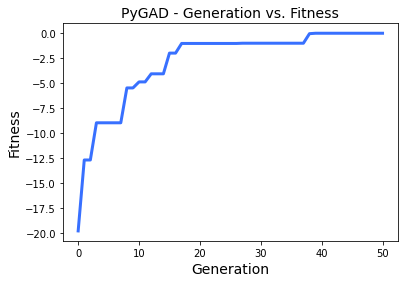

In [ ]:
ga_instance_rastrigin.run()
ga_instance_rastrigin.plot_fitness()
plt.show()
soluciones_rastrigin = ga_instance_rastrigin.solutions

In [ ]:
print("Aproximación final: ",soluciones_rastrigin[-1], " -> ",rastrigin(np.array(soluciones_rastrigin[-1])))

Aproximación final:  [0.7520386959560688, 0.03741959769094305]  ->  -10.713993596241858


In [ ]:
# Gráfica de la función Rastrigin
ncols = 150
nrows = 150
X = np.linspace(-5, 5, ncols)     
Y = np.linspace(-5, 5, nrows)     
X, Y = np.meshgrid(X, Y) 

Z = [-rastrigin(np.array([X[i,j], Y[i,j]]),0) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

for j in range(50):
    Pob = np.array(soluciones_rastrigin[j*8:(j+1)*8])
    fig, ax = plt.subplots()
    ax.contour(X,Y,Z, levels = 50)
    # ax.scatter(Pob[:,0],Pob[:,1],c ="yellow",linewidths = 2,marker ="^",edgecolor ="red",s = 200)
    plt.plot(Pob[:,0],Pob[:,1],"o",color="red",fillstyle="none",markersize=11,markeredgewidth=2,)
    plt.plot(Pob[:,0],Pob[:,1],".",color="red",)
    plt.title("Función de Rastrigin Gen " + str(j))
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

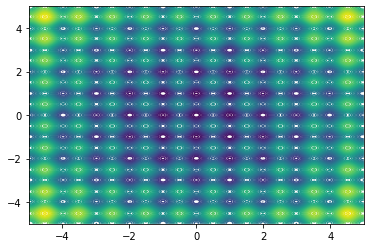

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(( -5, 5))
ax.set_ylim((-5, 5))
ax.contour(X,Y,Z, levels = 50)
plot, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    plot.set_data([], [])
    return (plot,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    Pob = np.array(soluciones_rastrigin[i*8:(i+1)*8])
    plot.set_data(Pob[:,0],Pob[:,1])
    return (plot,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)

HTML(anim.to_html5_video())

## Rosenbrock

In [ ]:
ga_instance_rosenbrock2d = pygad.GA(num_generations=50,
                       num_parents_mating=2,
                       fitness_func=rosenbrock2d,
                       sol_per_pop=10,
                       num_genes=2,
                       init_range_low=-5,
                       init_range_high=5,
                       parent_selection_type="sss",
                       keep_parents=1,
                       crossover_type="single_point",
                       mutation_type="random",
                       mutation_percent_genes=10,
                       save_solutions=True)

/usr/local/lib/python3.9/dist-packages/pygad/pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
/usr/local/lib/python3.9/dist-packages/pygad/pygad.py:940: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  if not self.suppress_warnings: warnings.warn("Us

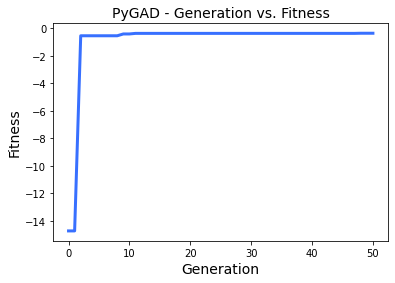

In [ ]:
#Ejecutamos la optimización
ga_instance_rosenbrock2d.run()
ga_instance_rosenbrock2d.plot_fitness()
plt.show()
soluciones_rosenbrock2d = ga_instance_rosenbrock2d.solutions

In [ ]:
print("Aproximación final: ",soluciones_rosenbrock2d[-1], " -> ",rosenbrock2d(np.array(soluciones_rosenbrock2d[-1])))

Aproximación final:  [-0.5315562634139708, 0.16938040525473497]  ->  -3.6264469583675094


In [ ]:
# Gráfica de la función Rosenbrock 
ncols = 150
nrows = 150
X = np.linspace(-5, 5, ncols)     
Y = np.linspace(-5, 5, nrows)     
X, Y = np.meshgrid(X, Y) 

Z = [-rosenbrock2d(np.array([X[i,j], Y[i,j]]),0) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

for j in range(50):
    Pob = np.array(soluciones_rosenbrock2d[j*8:(j+1)*8])
    fig, ax = plt.subplots()
    ax.contour(X,Y,Z, levels = 50)
    ax.scatter(Pob[:,0],Pob[:,1])
    plt.title("Función de Rosenbrock Gen " + str(j))
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

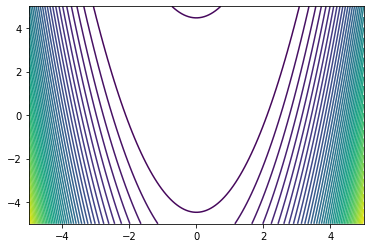

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(( -5, 5))
ax.set_ylim((-5, 5))
ax.contour(X,Y,Z, levels = 50)
scatter, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    plot.set_data([], [])
    return (scatter,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    Pob = np.array(soluciones_rastrigin[i*8:(i+1)*8])
    scatter.set_data(Pob[:,0],Pob[:,1])
    # scatter.set_offsets(Pob)
    return (scatter,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)

HTML(anim.to_html5_video())